In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing as pre
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [2]:
train = pd.read_csv('C:/Users/Administrator/Downloads/train.csv')
test = pd.read_csv('C:/Users/Administrator/Downloads/test.csv')
sample_submission = pd.read_csv ("C:/Users/Administrator/Downloads/sample_submission.csv")
pd.options.display.max_columns = 999

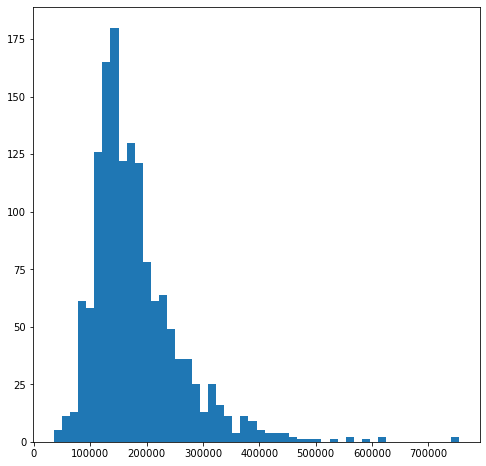

In [3]:
plt.figure(figsize= (8,8))
plt.hist(train['SalePrice'], bins = 50)
plt.show()

In [5]:
train['SalePriceLog'] =  np.log1p(train['SalePrice'])

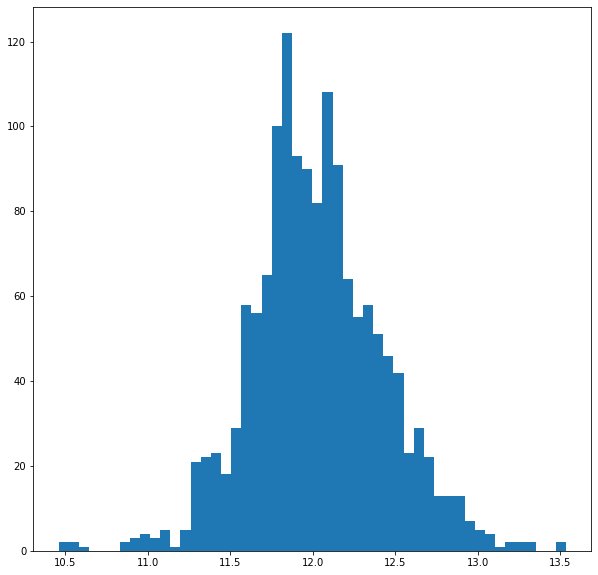

In [6]:
plt.figure(figsize= (10,10))
plt.hist(train['SalePriceLog'], bins = 50)
plt.show()

In [7]:
train['LotAreaLog'] =  np.log1p(train['LotArea'])
test['LotAreaLog'] =  np.log1p(test['LotArea'])

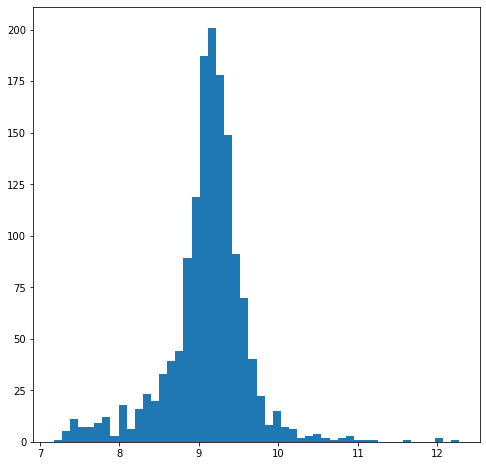

In [8]:
plt.figure(figsize= (8,8))
plt.hist(train['LotAreaLog'], bins = 50)
plt.show()

In [23]:
de = pre.LabelEncoder()
de.fit(train['OverallQual'])

train['OverallQual_encoded'] = de.transform(train['OverallQual'])

de2 = pre.LabelEncoder()
de2.fit(test['OverallQual'])

test['OverallQual_encoded'] = de2.transform(test['OverallQual'])

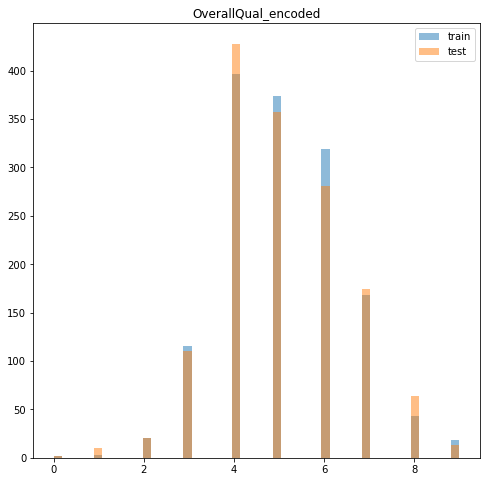

In [25]:
plt.figure(figsize= (8,8))
plt.hist(train['OverallQual_encoded'], bins = 50, label = 'train', alpha = 0.5)
plt.hist(test['OverallQual_encoded'], bins = 50, label = 'test', alpha = 0.5)
plt.title('OverallQual_encoded')
plt.legend(('train', 'test'))
plt.show()

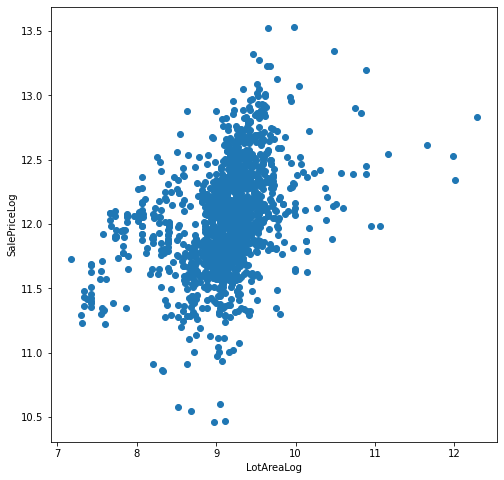

In [20]:
plt.figure(figsize= (8,8))
plt.scatter( train['LotAreaLog'], train['SalePriceLog'])
plt.xlabel('LotAreaLog')
plt.ylabel('SalePriceLog')
plt.show()

In [21]:
kf = KFold(n_splits=5)
kf.get_n_splits(train)

5

In [22]:
print(kf)
model = SGDRegressor()
rmse_list = []

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train.loc[train_index, ['LotAreaLog']], train.loc[test_index, ['LotAreaLog']]
    y_train, y_test = train.loc[train_index, 'SalePriceLog'], train.loc[test_index, 'SalePriceLog']

    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

KFold(n_splits=5, random_state=None, shuffle=False)
0 0.5792009720403796
1 0.632041615008385
2 0.5469615058630247
3 0.5884069326981695
4 0.6478792621392323
Mean rmse for 5-fold: 0.5988980575498382
std rmse for 5-fold: 0.036587150977831946


In [27]:
_max = max(max(train['OverallQual_encoded']), max(test['OverallQual_encoded']))
_min = min(min(train['OverallQual_encoded']), min(test['OverallQual_encoded']))
print(_min , _max)

0 9


In [28]:
train['OverallQual_encoded'] = (train['OverallQual_encoded'] - _min)/(_max - _min)
test['OverallQual_encoded'] = (test['OverallQual_encoded'] - _min)/(_max - _min)

In [29]:
print(kf)
model = SGDRegressor()
rmse_list = []

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train.loc[train_index, ['LotAreaLog', 'OverallQual_encoded']], train.loc[test_index, ['LotAreaLog', 'OverallQual_encoded']]
    y_train, y_test = train.loc[train_index, 'SalePriceLog'], train.loc[test_index, 'SalePriceLog']

    model.fit(X_train, y_train)
    print("model.coef_: ", model.coef_)
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

KFold(n_splits=5, random_state=None, shuffle=False)
model.coef_:  [1.0554295  1.51645641]
0 0.45092093558889745
model.coef_:  [1.10403738 1.36544045]
1 0.5710604879724951
model.coef_:  [1.03357198 1.52144879]
2 0.47483628219781104
model.coef_:  [1.06306365 1.43810329]
3 0.4875427782544428
model.coef_:  [1.02754853 1.56202998]
4 0.47713107935877125
Mean rmse for 5-fold: 0.49229831267448354
std rmse for 5-fold: 0.041165884357315025


In [30]:
train['OverallQual_encoded'] = pre.scale(train['OverallQual_encoded'])
test['OverallQual_encoded'] = pre.scale(test['OverallQual_encoded'])

In [32]:
print(kf)
model = SGDRegressor()
rmse_list = []

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train.loc[train_index, ['LotAreaLog', 'OverallQual_encoded']], train.loc[test_index, ['LotAreaLog', 'OverallQual_encoded']]
    y_train, y_test = train.loc[train_index, 'SalePriceLog'], train.loc[test_index, 'SalePriceLog']

    model.fit(X_train, y_train)
    print("model.coef_: ", model.coef_)
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

KFold(n_splits=5, random_state=None, shuffle=False)
model.coef_:  [1.12318933 0.22829236]
0 0.4876756639879265
model.coef_:  [1.22239579 0.21464349]
1 0.6117563531126331
model.coef_:  [1.13634892 0.21496877]
2 0.5499856688246856
model.coef_:  [1.18857227 0.21543287]
3 0.558132428186844
model.coef_:  [1.15887597 0.22188895]
4 0.538032022816609
Mean rmse for 5-fold: 0.5491164273857396
std rmse for 5-fold: 0.03975835906511647


In [33]:
model = SGDRegressor()
model.fit(train[['LotAreaLog', 'OverallQual_encoded']], train['SalePriceLog'])
model.coef_

array([1.16902959, 0.2223155 ])

In [34]:
model.intercept_

array([1.33816211])

In [35]:
prediction = model.predict(test[['LotAreaLog', 'OverallQual_encoded']])

In [36]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [37]:
sample_submission['SalePrice']=  np.expm1(prediction)

In [38]:
sample_submission.head()

,Id,SalePrice
0,1461,182436.717328
1,1462,270663.575896
2,1463,223571.138880
3,1464,178199.570178
4,1465,108420.075765


In [39]:
sample_submission.to_csv('submission.csv', index = None)

In [40]:
0.53032

0.53032